In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
frame = pd.read_csv('final_data/finalframe.csv',sep=';',index_col=[0])

# Estudo variavel alvo

In [5]:
target = frame.iloc[:,-1].to_frame()

In [6]:
target

,target
2014-10-01,1.244847
2015-02-01,3.274220
2015-03-01,3.827718
2015-04-01,3.284268
2015-05-01,2.794483
...,...
2022-02-01,2.296858
2022-03-01,3.200796
2022-05-01,3.179925
2022-06-01,2.215351


In [7]:
import matplotlib.pyplot as plt

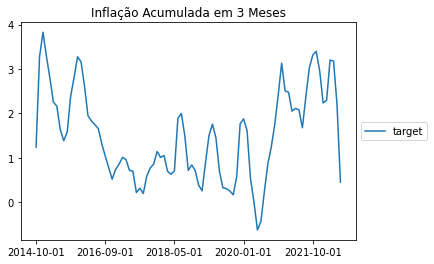

In [8]:
target.plot()
plt.title("Inflação Acumulada em 3 Meses")
plt.legend(['target'],title=None,title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/firstplot.png", bbox_inches='tight')


In [9]:
plot_df = target.copy()

In [10]:
plot_df['media'] = target.mean()[0]

In [11]:
target['target'].std()

1.021540376743999

In [12]:
target.mean()[0] + target['target'].std()#sd1

2.5277226895865463

In [13]:
target.mean()[0] + (target['target'].std()*2) #sd2

3.5492630663305453

In [14]:
target.mean()[0] - target['target'].std() #sd1

0.48464193609854833

In [15]:
target.mean()[0] - (target['target'].std()*2) #sd2

-0.5368984406454507

In [16]:
plot_df

,target,media
2014-10-01,1.244847,1.506182
2015-02-01,3.274220,1.506182
2015-03-01,3.827718,1.506182
2015-04-01,3.284268,1.506182
2015-05-01,2.794483,1.506182
...,...,...
2022-02-01,2.296858,1.506182
2022-03-01,3.200796,1.506182
2022-05-01,3.179925,1.506182
2022-06-01,2.215351,1.506182


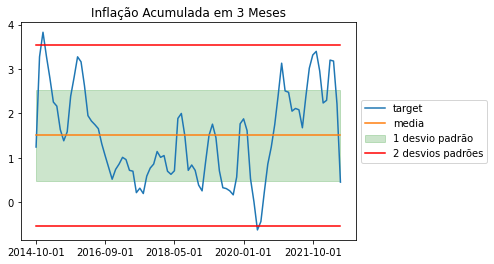

In [17]:
ax = plot_df.plot()
ax.set_title("Inflação Acumulada em 3 Meses")
ax.fill_between(plot_df.index,target.mean()[0] + target['target'].std(),target.mean()[0] - target['target'].std(), alpha = 0.2, color = 'green')
ax.plot(target.index,[target.mean()[0] + (target['target'].std()*2) for x in range(0,len(target))],color='red')
ax.plot(target.index,[target.mean()[0] - (target['target'].std()*2) for x in range(0,len(target))],color='red')
ax.legend(['target','media','1 desvio padrão','2 desvios padrões'],title=None,title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/plots.png", bbox_inches='tight')

In [18]:
plot_df2 = target.copy()
plot_df2['1 quartil']=plot_df2.quantile(.25)[0]
plot_df2['2 quartil']=plot_df2.quantile(.50)[0]
plot_df2['3 quartil']=plot_df2.quantile(.75)[0]

In [19]:
plot_df2

,target,1 quartil,2 quartil,3 quartil
2014-10-01,1.244847,0.711412,1.455945,2.236102
2015-02-01,3.274220,0.711412,1.455945,2.236102
2015-03-01,3.827718,0.711412,1.455945,2.236102
2015-04-01,3.284268,0.711412,1.455945,2.236102
2015-05-01,2.794483,0.711412,1.455945,2.236102
...,...,...,...,...
2022-02-01,2.296858,0.711412,1.455945,2.236102
2022-03-01,3.200796,0.711412,1.455945,2.236102
2022-05-01,3.179925,0.711412,1.455945,2.236102
2022-06-01,2.215351,0.711412,1.455945,2.236102


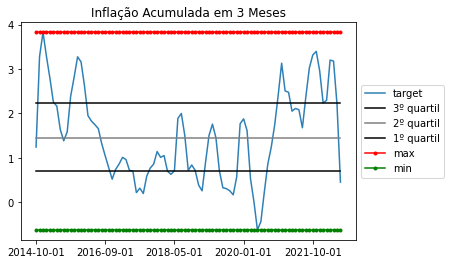

In [20]:
ax = plot_df2.plot(color=['#2E80B6','black','grey','black'])
ax.set_title("Inflação Acumulada em 3 Meses")
ax.plot(target.index,[target.max() for x in range(0,89)],marker='.',color='red')
ax.plot(target.index,[target.min() for x in range(0,89)],marker='.',color='green')
ax.legend(['target','3º quartil','2º quartil','1º quartil','max','min'],title=None,title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("plots/plots2.png", bbox_inches='tight')

In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Box-Plot Inflacao Acumulada em 3 Meses')

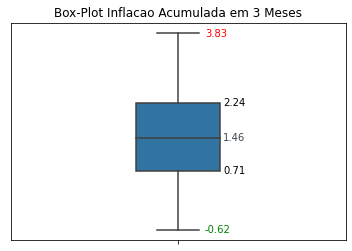

In [22]:
ax = sns.boxplot(y= target['target'], width=0.25,orient='v')
ax.annotate(round(target['target'].quantile(.25),2),(0.135,target['target'].quantile(.25)-.05),rotation=0)
ax.annotate(round(target['target'].quantile(.50),2),(0.135,target['target'].quantile(.50)-.05),rotation=0,color='#3C474E')
ax.annotate(round(target['target'].quantile(.75),2),(0.135,target['target'].quantile(.75)-.05),rotation=0)
ax.annotate(round(target['target'].max(),2),(0.08,target['target'].max()-.08),rotation=0,color='red')
ax.annotate(round(target['target'].min(),2),(0.08,target['target'].min()-.05),rotation=0,color='green')
plt.yticks([])
ax.set_ylabel(None)
ax.set_title("Box-Plot Inflacao Acumulada em 3 Meses")

Text(0.5, 1.0, 'Histograma Inflação Acumulada em 3 Meses')

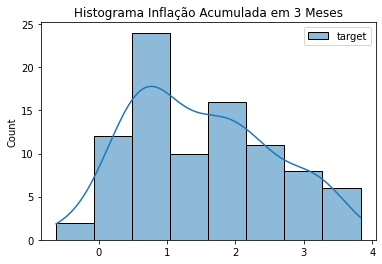

In [23]:
sns.histplot(target,kde=True,bins=8)
plt.title("Histograma Inflação Acumulada em 3 Meses")

<AxesSubplot:ylabel='Count'>

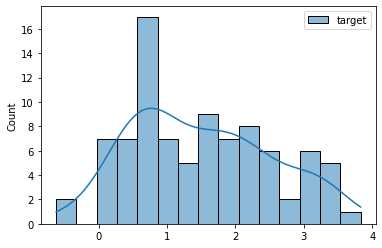

In [24]:
sns.histplot(target,kde=True,bins=15)

Text(0.5, 1.0, 'Scatter Plot Ordenado da Inflacao Acumulada')

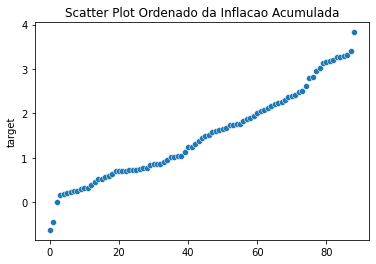

In [25]:
sns.scatterplot(y=target.target.sort_values(),x=[x for x in range(0,len(target))])
plt.title("Scatter Plot Ordenado da Inflacao Acumulada")

In [26]:
target.loc[target.target == max(target.target)]

,target
2015-03-01,3.827718


In [27]:
tsort = target.target.sort_values()

In [28]:
tsort[[0,1,len(tsort)-1]]

2020-05-01   -0.619299
2020-06-01   -0.430589
2015-03-01    3.827718
Name: target, dtype: float64

Text(0, 0.5, 'distância')

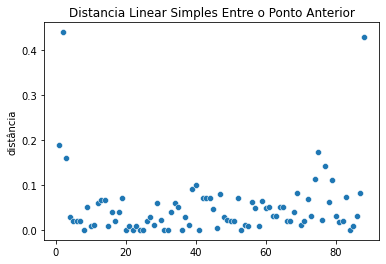

In [29]:
sns.scatterplot(y=tsort - tsort.shift(1),x=[x for x in range(0,len(target))])
plt.title("Distancia Linear Simples Entre o Ponto Anterior")
plt.ylabel("distância")

<AxesSubplot:ylabel='target'>

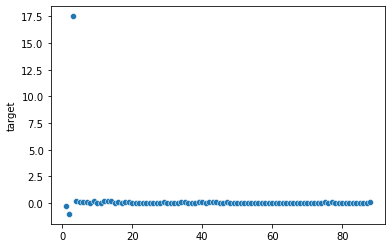

In [30]:
sns.scatterplot(y=((tsort - tsort.shift(1))/tsort.shift(1)),x=[x for x in range(0,len(target))])

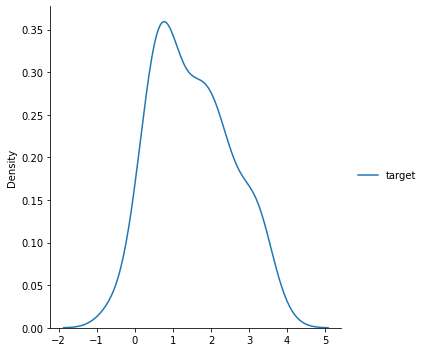

In [31]:
sns.displot(data=target,kind="kde")

In [32]:
target = target.drop(tsort[[0,1,len(tsort)-1]].index)

In [33]:
sum(target['target'] < 0)

0

Text(0.5, 1.0, 'Scatter Plot Ordenado da Inflacao Acumulada')

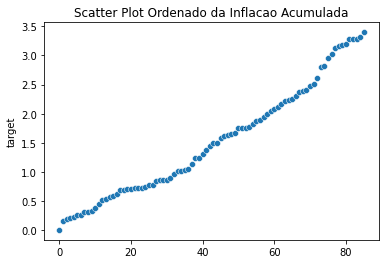

In [34]:
sns.scatterplot(y=target.target.sort_values(),x=[x for x in range(0,len(target))])
plt.title("Scatter Plot Ordenado da Inflacao Acumulada")

Text(0, 0.5, 'distância')

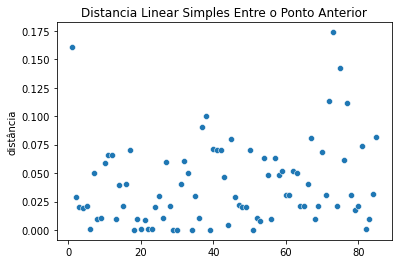

In [35]:
sns.scatterplot(y=target.target.sort_values()-target.target.sort_values().shift(1),x=[x for x in range(0,len(target))])
plt.title("Distancia Linear Simples Entre o Ponto Anterior")
plt.ylabel("distância")

Text(0.5, 1.0, 'Box-Plot Inflacao Acumulada em 3 Meses')

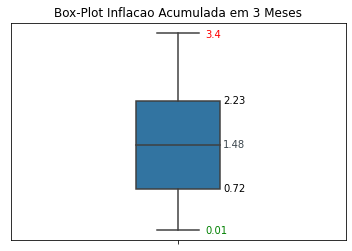

In [36]:
ax = sns.boxplot(y= target['target'], width=0.25,orient='v')
ax.annotate(round(target['target'].quantile(.25),2),(0.135,target['target'].quantile(.25)-.05),rotation=0)
ax.annotate(round(target['target'].quantile(.50),2),(0.135,target['target'].quantile(.50)-.05),rotation=0,color='#3C474E')
ax.annotate(round(target['target'].quantile(.75),2),(0.135,target['target'].quantile(.75)-.05),rotation=0)
ax.annotate(round(target['target'].max(),2),(0.08,target['target'].max()-.08),rotation=0,color='red')
ax.annotate(round(target['target'].min(),2),(0.08,target['target'].min()-.05),rotation=0,color='green')
plt.yticks([])
ax.set_ylabel(None)
ax.set_title("Box-Plot Inflacao Acumulada em 3 Meses")

Text(0.5, 1.0, 'Histograma Inflação Acumulada em 3 Meses')

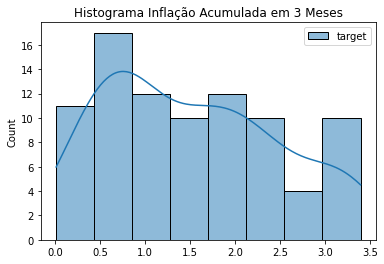

In [37]:
sns.histplot(target,kde=True,bins=8)
plt.title("Histograma Inflação Acumulada em 3 Meses")

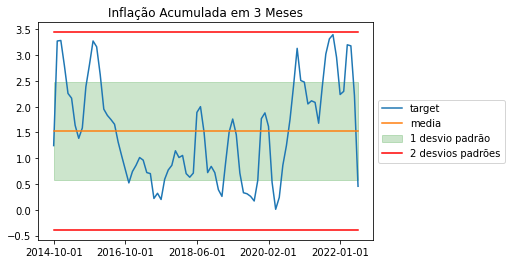

In [38]:
ax = target.plot()
ax.set_title("Inflação Acumulada em 3 Meses")
ax.plot([target['target'].mean() for x in range(0,len(target))])
ax.fill_between(target.index,target.mean()[0] + target['target'].std(),target.mean()[0] - target['target'].std(), alpha = 0.2, color = 'green')
ax.plot(target.index,[target.mean()[0] + (target['target'].std()*2) for x in range(0,len(target))],color='red')
ax.plot(target.index,[target.mean()[0] - (target['target'].std()*2) for x in range(0,len(target))],color='red')
ax.legend(['target','media','1 desvio padrão','2 desvios padrões'],title=None,title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))

In [39]:
plot_df2 = target.copy()
plot_df2['1 quartil']=plot_df2.quantile(.25)[0]
plot_df2['2 quartil']=plot_df2.quantile(.50)[0]
plot_df2['3 quartil']=plot_df2.quantile(.75)[0]

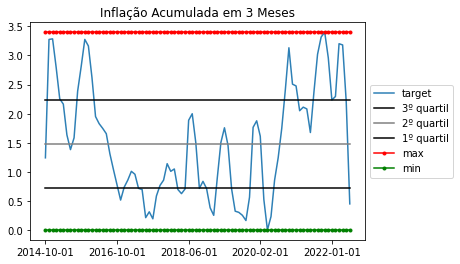

In [40]:
ax = plot_df2.plot(color=['#2E80B6','black','grey','black'])
ax.set_title("Inflação Acumulada em 3 Meses")
ax.plot(target.index,[target.max() for x in range(0,86)],marker='.',color='red')
ax.plot(target.index,[target.min() for x in range(0,86)],marker='.',color='green')
ax.legend(['target','3º quartil','2º quartil','1º quartil','max','min'],title=None,title_fontsize=30,loc='center left', bbox_to_anchor=(1, 0.5))

In [41]:
features = frame.iloc[:,:len(frame.columns)-1]

In [42]:
serie = pd.Series(features.columns).str.split("_",expand=True).iloc[:,[0,1]]

In [43]:
serie[1].unique()

array(['e2', 'sma3', 'TPFOVERMA12', 'CRDTJPJ12', 'sma12', 'sma6',
       'CINPJ12', 'TPFPREMA12', 'INDEP12', 'CRDPCAPF12', 'LTNFBC12',
       'FIPE0002Q2', 'NFSPJNNAS12', 'CRLTJPF12', 'CATEXDESSAZ12',
       'LFTFBC12', 'CRDSPJ12', 'NUCAPD12', 'CPCOPF12', 'NFGFNNAS12', None,
       'CRDPCOPF12', 'CRLPCOPF12', 'CTJPJ12', 'CTJPF12', 'NFGFJNNAS12',
       'NFSPNNAS12', 'NFGFNYS12', 'CABORRDESSAZ12', 'HIDR12',
       'NFEEJNNS12', 'HTRABD12', 'DINGFN12', 'FIPEQ2G12', 'CUTIND12',
       'CRDIN12', 'NFEEPYS12', 'NUCAP12', 'CTJ12', 'HTRAB12',
       'CRLPCAPF12', 'CRLINPJ12', 'IPCFIPE12', 'NFGFJNNS12', 'NFGFNNS12',
       'NFEMNNS12', 'FIPE0118Q2', 'NFSPJNNS12', 'NFSPPYS12', 'NFGFPYS12',
       'NFEEJNNAS12', 'CAINFODESSAZ12', 'DEXEMN12', 'CAAUTO12',
       'DIFISPN12', 'o1', 'RESPRGPS12', 'NFEMJNNS12', 'CRLTJPJ12'],
      dtype=object)

In [44]:
serie[1] = serie[1].apply(lambda x: None if x in ['e2','sma3','sma12','sma6',None,'o1'] else '_'+x).fillna('')

In [45]:
serie = serie[0] + serie[1]

In [46]:
serie = serie.unique()

In [47]:
len(serie)

476

In [48]:
target.target

2014-10-01    1.244847
2015-02-01    3.274220
2015-04-01    3.284268
2015-05-01    2.794483
2015-06-01    2.256800
                ...   
2022-02-01    2.296858
2022-03-01    3.200796
2022-05-01    3.179925
2022-06-01    2.215351
2022-07-01    0.455437
Name: target, Length: 86, dtype: float64

In [49]:
tbkp = target.copy()

In [50]:
told = plot_df[['target']].copy()

In [51]:
target = tbkp.copy()

In [52]:
told.describe()

,target
count,89.000000
mean,1.506182
std,1.021540
min,-0.619299
25%,0.711412
50%,1.455945
75%,2.236102
max,3.827718


In [53]:
df_faixas = pd.cut(told.target,[-np.inf,0,0.71,1.45,2.23,np.inf],labels=['deflacao','baixa','media','alta','muito_alta'])

In [54]:
target.describe()

,target
count,86.000000
mean,1.526423
std,0.958789
min,0.009191
25%,0.720288
50%,1.479424
75%,2.230914
max,3.397520


In [55]:
df_faixas2 = pd.cut(target.target,[-np.inf,0,0.72,1.47,2.23,np.inf],labels=['deflacao','baixa','media','alta','muito_alta']) 

In [56]:
df_faixas = df_faixas.to_frame()
df_faixas2 = df_faixas2.to_frame()

In [57]:
dft1 = df_faixas.copy()
dft2 = df_faixas2.copy()

In [58]:
df_faixas['estado'] = 'Com Outliers'
df_faixas2['estado'] = 'Sem Outliers'

In [59]:
df_faixas = pd.concat([df_faixas,df_faixas2])

In [60]:
sns.histplot

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

Text(0.5, 0, '')

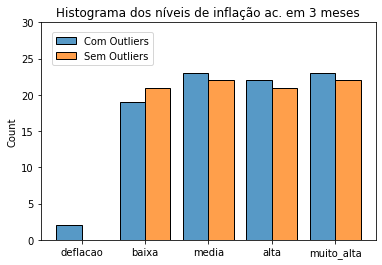

In [61]:
g = sns.histplot(data=df_faixas.reset_index().iloc[:,1:],x='target',hue='estado', multiple="dodge", shrink=.8)
g.set_title("Histograma dos níveis de inflação ac. em 3 meses")
g.set_ylim((0,30))
g.legend_.set_title(None)
g.legend_.set_bbox_to_anchor((0.35,0.98))
g.set_xlabel(None)

In [62]:
target.mean() # +- 6.34 % a.a

target    1.526423
dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = frame.iloc[:,:len(frame.columns)].loc[dft1.index,:]

In [65]:
y= dft1['target']

In [66]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = scaler.get_feature_names_out()

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.2)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
model = LogisticRegression(max_iter=100000)

In [70]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [71]:
model.score(X_test,y_test)

0.6111111111111112

In [72]:
model.predict(X_test)

array(['muito_alta', 'muito_alta', 'alta', 'alta', 'media', 'baixa',
       'media', 'alta', 'alta', 'media', 'alta', 'media', 'baixa',
       'deflacao', 'alta', 'alta', 'media', 'baixa'], dtype=object)

In [73]:
X = frame.iloc[:,:len(frame.columns)].loc[dft2.index,:]

In [74]:
y= dft2['target']

In [75]:
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = scaler.get_feature_names_out()

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.2)

In [77]:
model = LogisticRegression(max_iter=100000)

In [78]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [79]:
model.score(X_test,y_test)

0.5

In [80]:
# Seguindo a analise dos desvios padroes

# deflação, baixa, normal, alta, muito alta
# -inf -> -0,55 -> 0,48 -> 2.53 -> 3.56 -> inf

# baixa, media, alta
# -inf -> 0.48 -> 2.52 -> inf

In [81]:
print(f"""
      Os niveis de desvio padrão são:
      +2: {round(target.target.mean() + target.target.std()*2,2)}
      +1: {round(target.target.mean() + target.target.std()*1,2)}
      media: {round(target.target.mean(),2)}
      -1: {round(target.target.mean() - target.target.std()*1,2)}
      -2: {round(target.target.mean() - target.target.std()*2,2)}
      """)


      Os niveis de desvio padrão são:
      +2: 3.44
      +1: 2.49
      media: 1.53
      -1: 0.57
      -2: -0.39
      


In [82]:
df_faixas = pd.cut(target.target,[-np.inf,-.39,0.57,1.53,2.49,np.inf],labels=['deflacao','baixa','normal','alta','muito_alta'])
freq = df_faixas.value_counts().to_frame().loc[['deflacao','baixa','normal','alta','muito_alta']]
freq

,target
deflacao,0
baixa,14
normal,31
alta,26
muito_alta,15


In [83]:
X = frame.iloc[:,:len(frame.columns)].loc[target.index]

In [84]:
y= df_faixas

In [85]:
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = scaler.get_feature_names_out()

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.2)

In [87]:
model = LogisticRegression(max_iter=100000)

In [88]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [89]:
model.score(X_test,y_test)

0.6111111111111112

In [90]:
model.predict(X_test)

array(['muito_alta', 'alta', 'baixa', 'alta', 'alta', 'normal', 'baixa',
       'normal', 'alta', 'normal', 'alta', 'normal', 'normal', 'baixa',
       'alta', 'alta', 'normal', 'alta'], dtype=object)

In [91]:
df_faixas = pd.cut(target.target,[-np.inf,0.70,2.53,np.inf],labels=['baixa','media','alta'])
freq = df_faixas.value_counts().to_frame().loc[['baixa','media','alta']]
freq

,target
baixa,17
media,55
alta,14


In [92]:
X = frame.iloc[:,:len(frame.columns)].loc[target.index]

In [93]:
y= df_faixas

In [94]:
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = scaler.get_feature_names_out()

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=.2)

In [96]:
model = LogisticRegression(max_iter=100000)

In [97]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [98]:
model.score(X_test,y_test)

0.7222222222222222

In [99]:
model.predict(X_test)

array(['alta', 'media', 'baixa', 'media', 'media', 'baixa', 'baixa',
       'media', 'media', 'media', 'media', 'media', 'media', 'baixa',
       'media', 'media', 'media', 'media'], dtype=object)

In [100]:
frame.corr().iloc[:,len(frame.columns)-1].abs().sort_values(ascending=False)[1:]

5002_e2_sma6_sma12                0.747942
256_sma3_sma12                    0.738623
256_sma3_sma6_sma12               0.738265
256_e2_sma3_sma6_sma12            0.733589
256_e2_sma3_sma12                 0.732845
                                    ...   
29028_sma3_sma6                   0.401024
5743_e2_sma12                     0.400939
28612_sma3_o1                     0.400780
10625                             0.400382
BM12_DINGFN12_e2_sma6_sma12_o1    0.400337
Name: target, Length: 883, dtype: float64

In [101]:
corframe = pd.concat([X,y],axis=1).corr()['target'].abs().sort_values(ascending=False).iloc[1:].reset_index()

In [102]:
cf = corframe['index'].str.split("_",expand=True).iloc[:,[0,1,6]]

In [103]:
cf[1].unique()

array(['sma3', 'e2', 'CRDTJPJ12', 'sma6', 'TPFOVERMA12', 'sma12',
       'CINPJ12', 'CRDPCAPF12', 'INDEP12', 'TPFPREMA12', 'CRLTJPF12',
       'FIPE0002Q2', 'LTNFBC12', 'CATEXDESSAZ12', 'CTJPJ12', 'CTJPF12',
       'LFTFBC12', 'NFSPJNNAS12', 'CRLINPJ12', 'NFGFNNAS12', None,
       'CRLPCOPF12', 'CRDSPJ12', 'CTJ12', 'HTRABD12', 'NUCAPD12',
       'NFEEPYS12', 'NFSPNNAS12', 'NFGFNYS12', 'HIDR12', 'CPCOPF12',
       'CABORRDESSAZ12', 'HTRAB12', 'CRLPCAPF12', 'CRDIN12', 'CRDPCOPF12',
       'NFGFJNNS12', 'NFSPJNNS12', 'CRLTJPJ12', 'NFGFJNNAS12',
       'FIPEQ2G12', 'NFSPPYS12', 'NFGFPYS12', 'NFEEJNNS12', 'NFEMNNS12',
       'IPCFIPE12', 'CAAUTO12', 'RESPRGPS12', 'NUCAP12', 'CUTIND12',
       'NFEEJNNAS12', 'DINGFN12', 'DEXEMN12', 'NFGFNNS12', 'o1',
       'DIFISPN12', 'NFEMJNNS12', 'FIPE0118Q2', 'CAINFODESSAZ12'],
      dtype=object)

In [104]:
cf[1][np.isin(cf[1],['sma3', 'e2', 'sma6', 'sma12', 'o1'])] = None

In [105]:
cf[1][np.isin(cf[1],['sma3', 'e2', 'sma6', 'sma12', 'o1'])]

Series([], Name: 1, dtype: object)

In [106]:
cf[1][~np.isin(cf[1],None)] = "_" + cf[1][~np.isin(cf[1],None)]

In [107]:
cf = cf.replace({None:""})

In [108]:
cf[0] = cf[0] + cf[1]

In [109]:
cf

,0,1,6
0,256,,
1,256,,
2,256,,
3,256,,
4,1567,,
...,...,...,...
878,2253,,
879,10625,,
880,2250,,
881,28619,,


In [110]:
cf['corr'] = (corframe.iloc[:,1])

In [111]:
cf = cf[[0,'corr']]

In [112]:
cf

,0,corr
0,256,0.762976
1,256,0.759385
2,256,0.752968
3,256,0.750115
4,1567,0.741894
...,...,...
878,2253,0.329843
879,10625,0.326251
880,2250,0.325440
881,28619,0.320113


In [113]:
finalcf = cf.groupby(0)['corr'].max().to_frame().sort_values('corr',ascending=False)

<AxesSubplot:ylabel='Count'>

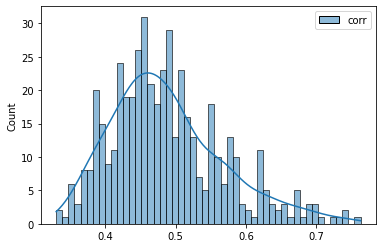

In [114]:
sns.histplot(finalcf,kde=True,bins=50)

In [115]:
finalcf2 = finalcf[finalcf['corr']>=.61]

In [116]:
bcb_md = pd.read_csv('data/bcb_metadata.csv',encoding='latin-1',sep=';')

In [117]:
finalcf2.merge(bcb_md.astype(str),how='left',left_on=0,right_on='Codigo')[['Codigo','Nome']]

,Codigo,Nome
0,256,Taxa de juros de longo prazo - TJLP
1,1567,Índice volume de vendas no varejo - Hipermerca...
2,5739,NFSP sem desvalorização cambial (% PIB) - Flux...
3,5002,NFSP sem desvalorização cambial - Fluxo acumul...
4,5749,NFSP sem desvalorização cambial (% PIB) - Flux...
5,NaN,NaN
6,4520,Dívida Líquida do Setor Público (% PIB) - Inte...
7,1502,Índice volume de vendas no varejo - Hiper/supe...
8,1405,Consumo de energia elétrica - Brasil - Outros
9,1457,Índice de volume de vendas no varejo - Total -...


In [118]:
finalcf2.merge(bcb_md.astype(str),how='left',left_on=0,right_on='Codigo')[['Codigo','Nome']].to_excel('tst.xlsx')

In [119]:
# Principais variaveis
# TJLP	                    256
# VOL VENDAS VAREJO	        1567
# NFSP	                    5739


In [120]:
corframe[corframe['index'].str.split("_",expand=True)[0] == '256'] # 0

,index,target
0,256_sma3_sma12,0.762976
1,256_e2_sma3_sma12,0.759385
2,256_sma3_sma6_sma12,0.752968
3,256_e2_sma3_sma6_sma12,0.750115


In [121]:
corframe[corframe['index'].str.split("_",expand=True)[0] == '1567'] # 4

,index,target
4,1567_e2_sma3_sma6_sma12,0.741894


In [122]:
corframe[corframe['index'].str.split("_",expand=True)[0] == '5739'] # 5

,index,target
5,5739_e2_sma3_sma6_sma12,0.738236
20,5739_sma3_sma12,0.680539
25,5739_sma6_sma12,0.670841
33,5739_sma3_sma6_sma12,0.658504


In [123]:
colunas_selecionadas = corframe.iloc[[0,4,5]]['index'].to_list()

In [124]:
ef = frame[colunas_selecionadas]

In [125]:
ef1 = pd.concat([ef.iloc[:,0].to_frame(),target.target],axis=1).dropna()

-0.7458925873166706
6.117428219868917


Text(6.35, 3.1, 'y = 6.12 + -0.75 * x')

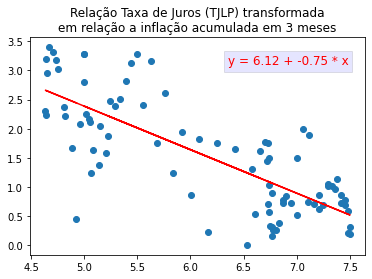

In [126]:
x = ef1['256_sma3_sma12']
Y = ef1['target']
plt.scatter(x,Y)
m, b = np.polyfit(x, Y, 1)
print(m)
print(b)
plt.plot(x, m*x+b, color='red')
plt.title('Relação Taxa de Juros (TJLP) transformada\nem relação a inflação acumulada em 3 meses')
plt.text(6.35, 3.1,f"""y = {round(b,2)} + {round(m,2)} * x""",fontsize=12,color='red',bbox = dict(facecolor = 'blue', alpha = 0.1))

In [127]:
ef1 = pd.concat([ef.iloc[:,1].to_frame(),target.target],axis=1).dropna()

-0.04523626364363608
6.9793806670604805


Text(125, 3.1, 'y = 6.98 + -0.05 * x')

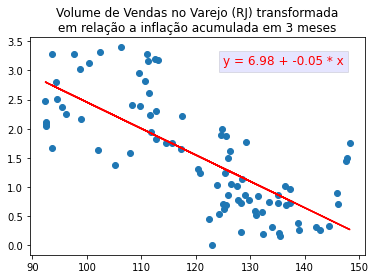

In [128]:
x = ef1['1567_e2_sma3_sma6_sma12']
Y = ef1['target']
plt.scatter(x,Y)
m, b = np.polyfit(x, Y, 1)
print(m)
print(b)
plt.plot(x, m*x+b, color='red')
plt.title('Volume de Vendas no Varejo (RJ) transformada\nem relação a inflação acumulada em 3 meses')
plt.text(125, 3.1,f"""y = {round(b,2)} + {round(m,2)} * x""",fontsize=12,color='red',bbox = dict(facecolor = 'blue', alpha = 0.1))

In [129]:
ef1 = pd.concat([ef.iloc[:,2].to_frame(),target.target],axis=1).dropna()

0.8233409499158046
0.4364848472704474


Text(0.1, 3.2, 'y = 0.44 + 0.82 * x')

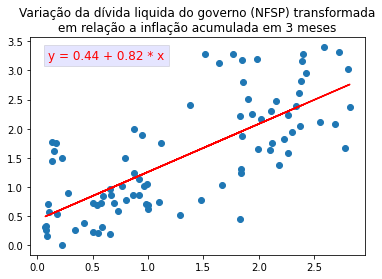

In [130]:
x = ef1['5739_e2_sma3_sma6_sma12']
Y = ef1['target']
plt.scatter(x,Y)
m, b = np.polyfit(x, Y, 1)
print(m)
print(b)
plt.plot(x, m*x+b, color='red')
plt.title('Variação da dívida liquida do governo (NFSP) transformada\nem relação a inflação acumulada em 3 meses')
plt.text(0.1, 3.2,f"""y = {round(b,2)} + {round(m,2)} * x""",fontsize=12,color='red',bbox = dict(facecolor = 'blue', alpha = 0.1))

In [131]:
bmf =pd.concat([ef,target.target],axis=1).dropna() #basic_model_frame

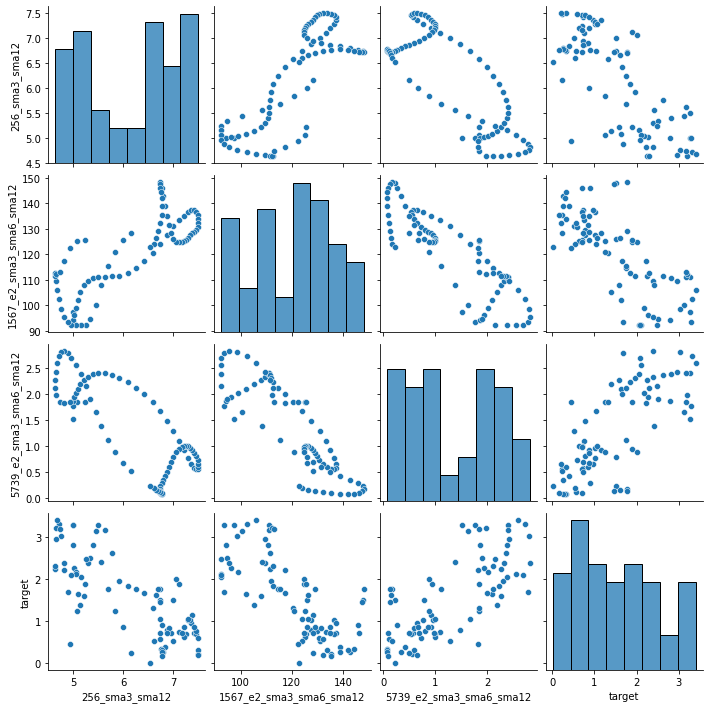

In [132]:
sns.pairplot(bmf)

In [133]:
bmf

,256_sma3_sma12,1567_e2_sma3_sma6_sma12,5739_e2_sma3_sma6_sma12,target
2014-10-01,5.063333,125.356132,1.842989,1.244847
2015-02-01,5.000000,97.626304,1.511731,3.274220
2015-04-01,5.000000,93.629723,1.765162,3.284268
2015-05-01,5.000000,94.258399,1.858095,2.794483
2015-06-01,5.013889,96.102763,1.938779,2.256800
...,...,...,...,...
2022-02-01,4.635000,112.638269,2.111375,2.296858
2022-03-01,4.644722,112.430031,1.983546,3.200796
2022-05-01,4.730833,113.040918,1.846558,3.179925
2022-06-01,4.816111,117.383396,1.831723,2.215351


In [152]:
X = bmf.iloc[:,0:3]

In [153]:
y= bmf['target']

In [154]:
scaler = RobustScaler()
scaler.fit(X)

RobustScaler()

In [155]:
X = scaler.transform(X)


In [157]:
X = pd.DataFrame(X)

In [158]:
X.columns = scaler.get_feature_names_out()

<AxesSubplot:>

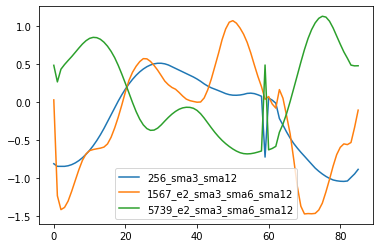

In [160]:
X.plot()

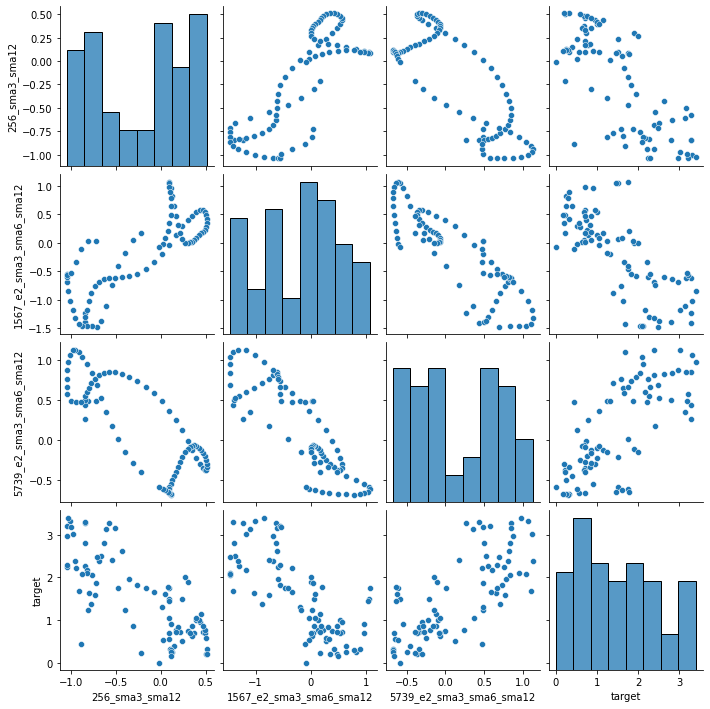

In [164]:
sns.pairplot(pd.concat([X,bmf.reset_index().iloc[:,4]],axis=1))

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [276]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [277]:
model = OLS(y_train.to_numpy(),add_constant(X_train))

In [278]:
model = model.fit()

In [279]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     44.96
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           9.37e-16
Time:                        04:10:41   Log-Likelihood:                -55.803
No. Observations:                  68   AIC:                             119.6
Df Residuals:                      64   BIC:                             128.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.2771      0.072     17.754      0.000       1.133       1.421
256_sma3_sma12             -0.7929      0.240     -3.303      0.002      -1.272      -0.313
1567_e2_sma3_sma6_sma12    -0.1980      0.208     -0.950      0.346      -0.614       0.218
5739_e2_sma3_sma6_sma12     0.5278      0.246      2.149      0.035       0.037       1.018
==============================================================================
Omnibus:                        2.148   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.603
Skew:                           0.182   Prob(JB):                        0.449
Kurtosis:                       2.342   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_train.to_numpy(),model.predict(add_constant(X_train)))

0.4536459817173596

In [281]:
mae(y_test.to_numpy(),model.predict(add_constant(X_test)))

0.468294693119927